Building multiple linear regression model to predict price of Toyota corolla (Y) based on given attributes(X).

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [13]:
#Reading the given table data

Toyota_corolla = pd.read_csv("ToyotaCorolla - MLR.csv")
Toyota_corolla 

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [5]:
#Let do EDA on given data
#First check the given data details

Toyota_corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [7]:
#There is no null values in the given data and Fuel_type is object. So we cant use that to predict dependent variable

In [14]:
# Rearrange the columns and change the Price columns at end.
Toyota_corolla = pd.DataFrame(Toyota_corolla, columns=["Age_08_04","KM","Fuel_Type","HP","Automatic","cc","Doors","Cylinders","Gears","Weight","Price"])
Toyota_corolla 

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Price
0,23,46986,Diesel,90,0,2000,3,4,5,1165,13500
1,23,72937,Diesel,90,0,2000,3,4,5,1165,13750
2,24,41711,Diesel,90,0,2000,3,4,5,1165,13950
3,26,48000,Diesel,90,0,2000,3,4,5,1165,14950
4,30,38500,Diesel,90,0,2000,3,4,5,1170,13750
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,0,1300,3,4,5,1025,7500
1432,72,19000,Petrol,86,0,1300,3,4,5,1015,10845
1433,71,17016,Petrol,86,0,1300,3,4,5,1015,8500
1434,70,16916,Petrol,86,0,1300,3,4,5,1015,7250


EDA

In [15]:
#We can drop Fuel_Type column bocoz its catogorical value.

Toyota_corolla=Toyota_corolla.drop(["Fuel_Type"],axis=1)
Toyota_corolla

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Price
0,23,46986,90,0,2000,3,4,5,1165,13500
1,23,72937,90,0,2000,3,4,5,1165,13750
2,24,41711,90,0,2000,3,4,5,1165,13950
3,26,48000,90,0,2000,3,4,5,1165,14950
4,30,38500,90,0,2000,3,4,5,1170,13750
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,4,5,1025,7500
1432,72,19000,86,0,1300,3,4,5,1015,10845
1433,71,17016,86,0,1300,3,4,5,1015,8500
1434,70,16916,86,0,1300,3,4,5,1015,7250


In [16]:
#Lets find the correlation between all table values

Toyota_corolla .corr(numeric_only=True)

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Price
Age_08_04,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614,0.314990
Automatic,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249,0.033081
cc,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618,0.185326
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613,0.063104
Weight,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198,1.000000


Key points from the above correlation table

* All Cylinders values are same hence it is showing like NaN.
* X(Independent variables) and Y(Dependent variables) are moderately correleated.
* Some of X variables are highly correlated with other X variables. Hence its violating one of multlinear assumptions(No multicollinearity).
  


In [17]:
#Cylinders also not required becoz all values are same hence we can drop that column also.
Toyota_corolla=Toyota_corolla.drop(["Cylinders"],axis=1)
Toyota_corolla

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Price
0,23,46986,90,0,2000,3,5,1165,13500
1,23,72937,90,0,2000,3,5,1165,13750
2,24,41711,90,0,2000,3,5,1165,13950
3,26,48000,90,0,2000,3,5,1165,14950
4,30,38500,90,0,2000,3,5,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025,7500
1432,72,19000,86,0,1300,3,5,1015,10845
1433,71,17016,86,0,1300,3,5,1015,8500
1434,70,16916,86,0,1300,3,5,1015,7250


In [18]:
#Again check correlation
Toyota_corolla.corr(numeric_only=True)

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Price
Age_08_04,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614,0.314990
Automatic,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249,0.033081
cc,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618,0.185326
Gears,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613,0.063104
Weight,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198,1.000000


After removeing the Cylinders columns Some of X variables are moderately correlated with other X variables. Hence its violating one of multlinear assumptions(No multicollinearity).

Lets split the dataset into two parts. One is for training and another one is for testing

In [85]:
# Shuffle the dataset
Toyota_corolla_shuffled = Toyota_corolla.sample(frac=1, random_state=42).reset_index(drop=True)

# Split based on index
train_size = int(0.8 * len(Toyota_corolla))
train_set = Toyota_corolla_shuffled[:train_size]
test_set = Toyota_corolla_shuffled[train_size:]
print(test_set,train_set)

      Age_08_04      KM   HP  Automatic    cc  Doors  Gears  Weight  Price
1148         56   45336  110          0  1600      5      5    1080  12500
1149         68  112116  110          0  1600      5      5    1070   9950
1150         79   95000   86          0  1300      5      5    1035   6950
1151         64   34114  110          0  1600      3      5    1050   9750
1152         73   88186   72          0  2000      3      5    1115   6950
...         ...     ...  ...        ...   ...    ...    ...     ...    ...
1431         76  125778  110          0  1600      3      5    1050   6900
1432         73  107108  110          0  1600      3      5    1050   7950
1433         80   71740  110          0  1600      5      5    1070   6950
1434         63   64690   86          0  1300      3      5    1020   9750
1435         80  110000  110          0  1600      4      5    1035   6800

[288 rows x 9 columns]       Age_08_04      KM   HP  Automatic    cc  Doors  Gears  Weight  Price
0

Lets build model with given value to verify the multi linear assumption

In [56]:
#Build model

Model = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight',data=train_set).fit()
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     903.8
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        23:13:36   Log-Likelihood:                -9901.3
No. Observations:                1148   AIC:                         1.982e+04
Df Residuals:                    1139   BIC:                         1.987e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7523.4584   1546.842     -4.864      0.000   -1.06e+04   -4488.479
Age_08_04   -123.2166      3.039    -40.542      0.000    -129.180    -117.253
KM            -0.0190      0.001    -13.169      0.000      -0.022      -0.016
HP            26.5217      3.065      8.652      0.000      20.507      32.536
Automatic    364.1977    175.393      2.076      0.038      20.068     708.327
cc            -0.1040      0.092     -1.136      0.256      -0.283       0.076
Doors        -27.6598     45.527     -0.608      0.544    -116.986      61.666
Gears        650.3093    240.490      2.704      0.007     178.456    1122.163
Weight        19.3495      0.991     19.528      0.000      17.405      21.294
==============================================================================
Omnibus:                      175.951   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1675.734
Skew:                          -0.373   Prob(JB):                         0.00
Kurtosis:                       8.872   Cond. No.                     2.97e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observations from above summary

* R-squared and Adj R-squared values are good.
* Log-Likelihood is too low. Higher values indicated a better fit.
* AIC and BIC values are too high. lower values indicated good model quality.
* Some of P>|t| are more than 0.05
* We need to improve our model.

To Make our model as good we need to verify the below points

* Are all X-columns good for precticting Y.?
* All observations are good values or any outliears are there.

We can use VIF methode to verify all X-columns are good for pretecting Y-value

We need to create a model with all X-columns values like below combinations and check vif value for each columns
                                                                                                
    * VIF_Age_08_04 --> Age_08_04~KM+HP+Automatic+cc+Doors+Gears+Weight
    * VIF_KM        --> KM~Age_08_04+HP+Automatic+cc+Doors+Gears+Weight
    * VIF_HP        --> HP~KM+Age_08_04+Automatic+cc+Doors+Gears+Weight 
    * VIF_Automatic --> Automatic~HP+KM+Age_08_04+cc+Doors+Gears+Weight
    * VIF_cc        --> cc~Automatic+HP+KM+Age_08_04+Doors+Gears+Weight
    * VIF_Doors     --> Doors~cc+Automatic+HP+KM+Age_08_04+Gears+Weight
    * VIF_Gears     --> Gears~Doors+cc+Automatic+HP+KM+Age_08_04+Weight
    * VIF_Weight    --> Weight~Gears+Doors+cc+Automatic+HP~KM+Age_08_04

Higher VIF value indicates significant multicollinearity.

To Compute VIF we need to find R-squrd value.

In [57]:
# Compute VIF values

#VIF_Age_08_04
rsq_Age_08_04 = smf.ols('Age_08_04~KM+HP+Automatic+cc+Doors+Gears+Weight',data=train_set).fit().rsquared
vif_Age_08_04 = 1/(1-rsq_Age_08_04)

#VIF_KM
rsq_KM = smf.ols('KM~Age_08_04+HP+Automatic+cc+Doors+Gears+Weight',data=train_set).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

#VIF_HP
rsq_HP = smf.ols('HP~KM+Age_08_04+Automatic+cc+Doors+Gears+Weight',data=train_set).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

#VIF_Automatic
rsq_Automatic = smf.ols('Automatic~HP+KM+Age_08_04+cc+Doors+Gears+Weight',data=train_set).fit().rsquared  
vif_Automatic = 1/(1-rsq_Automatic)

#VIF_cc
rsq_cc = smf.ols('cc~Automatic+HP+KM+Age_08_04+Doors+Gears+Weight',data=train_set).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

#VIF_Door
rsq_Door = smf.ols('Doors~cc+Automatic+HP+KM+Age_08_04+Gears+Weight',data=train_set).fit().rsquared  
vif_Door = 1/(1-rsq_Door)

#VIF_Gears
rsq_Gears = smf.ols('Gears~Doors+cc+Automatic+HP+KM+Age_08_04+Weight',data=train_set).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)

#VIF_Weight
rsq_Weight = smf.ols('Weight~Gears+Doors+cc+Automatic+HP+KM+Age_08_04',data=train_set).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight)

# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','Automatic','cc','Doors','Gears','Weight'],'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_Automatic,vif_cc,vif_Door,vif_Gears,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,2.036325
1,KM,1.749957
2,HP,1.227829
3,Automatic,1.060735
4,cc,1.132962
5,Doors,1.179532
6,Gears,1.116358
7,Weight,1.695896


Residual Analysis

Test for Normality of Residuals (Q-Q Plot).

Q-Q plot is used to check the normal distribution of residuals

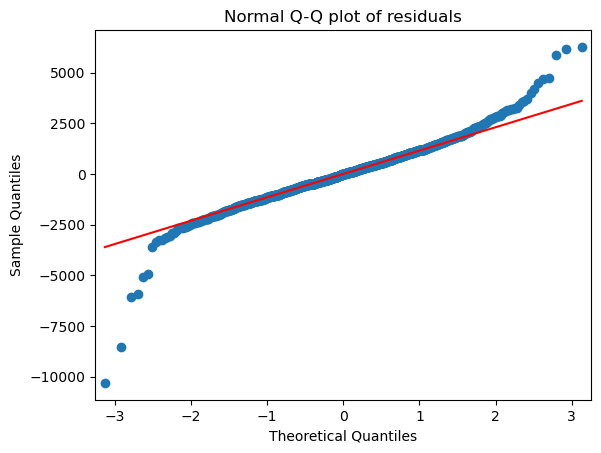

In [58]:
model = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight',data=train_set).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Some of the Residuals are not in the line. Hence the data is violateing Multilinear Regression Assumptions(Normal Distribution of Errors)

In [59]:
#Residual Plot for Homoscedasticity(Checking the variance of all residuals whether equal or not)
#Methode for standardizing_values
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

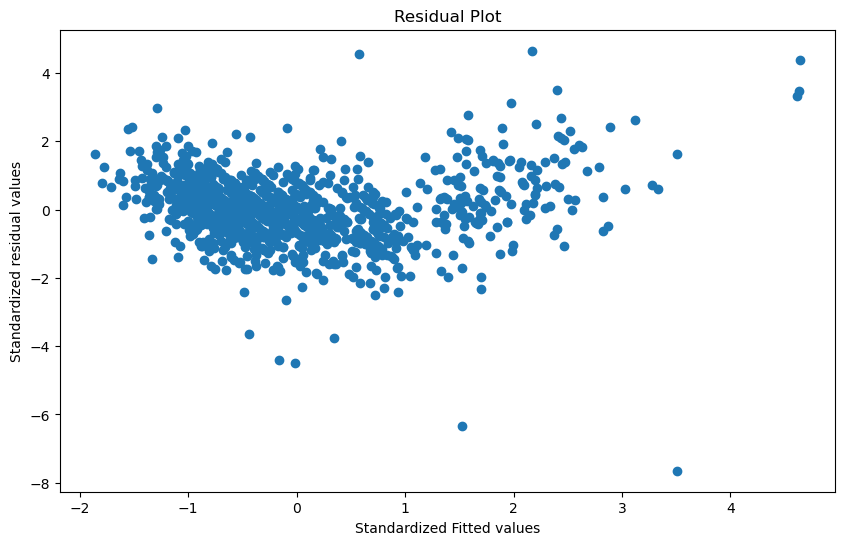

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

From the above plot we can identify that the Residuals are having almost same varience. hence one of Multilinear Regression Assumptions is true(Homoscedasticity).

From the Above ploting we can find that some of Multilinear Regression Assumptions are getting violated. We need to make our model to don't violate the assumption.

In [61]:
#Model Deletion Diagnostics

#Lets use cook's distance to find influncer or outliear on the observation.

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([6.81916785e-05, 2.17739547e-04, 1.98234073e-03, ...,
       1.30450690e-04, 4.26862083e-02, 1.08318985e-03])

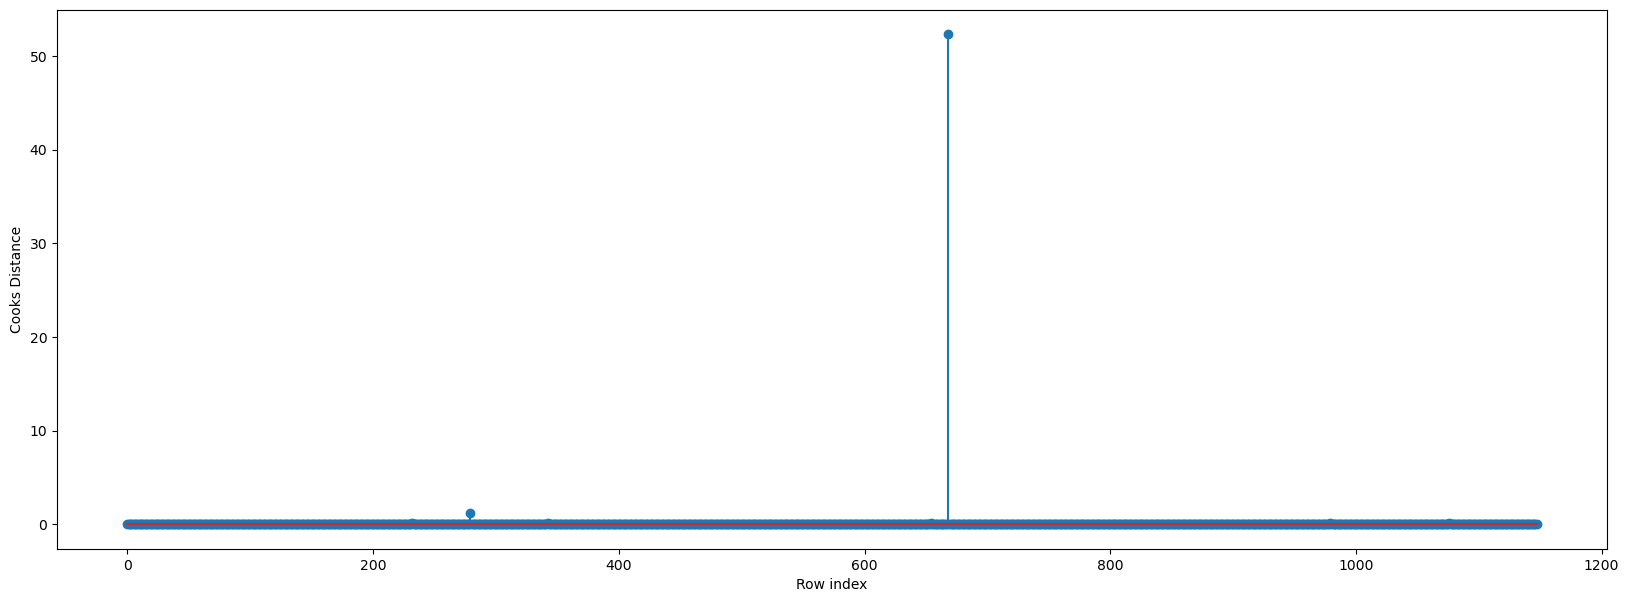

In [62]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(train_set)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [63]:
#Let find the max value index and value
(np.argmax(c),np.max(c))

(668, 52.306423253140174)

In [64]:
k = 9
n = 1148
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.02613240418118467

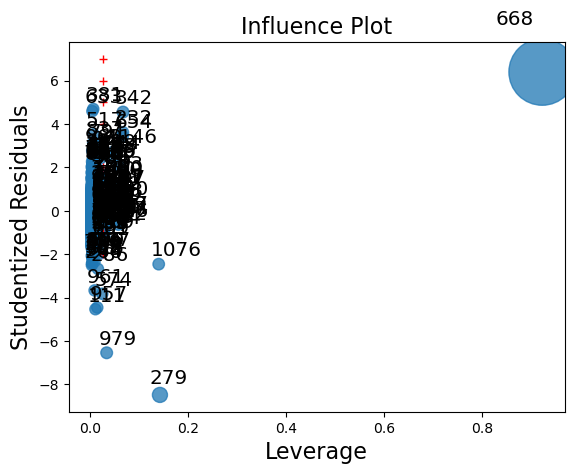

In [65]:
influence_plot(model,alpha=.05)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

From the above plot, it is evident that data points 668 are the influencers as their H Leverage values are higher and size is higher (size is prportional to cook's distance)

In [87]:
train_set[train_set.index.isin([668])]

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Price
668,25,20019,110,1,16000,5,5,1180,18950


In [88]:
train_set1=train_set.drop(train_set.index[[668]],axis=0).reset_index()

In [89]:
train_set1

,index,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Price
0,0,50,22500,97,0,1400,3,5,1025,10800
1,1,68,80426,110,0,1600,3,5,1055,9950
2,2,59,130000,72,0,2000,4,5,1135,7500
3,3,71,76000,110,0,1600,5,5,1070,9250
4,4,65,59000,110,0,1600,5,5,1075,9750
...,...,...,...,...,...,...,...,...,...,...
1142,1143,69,155000,72,0,2000,3,5,1115,7950
1143,1144,54,63792,110,0,1600,5,5,1075,10250
1144,1145,11,12500,110,0,1600,5,5,1115,18900
1145,1146,30,34000,192,0,1800,3,5,1185,22750


In [90]:
#Drop the original index
train_set1=train_set1.drop(['index'],axis=1)

In [91]:
train_set1

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Price
0,50,22500,97,0,1400,3,5,1025,10800
1,68,80426,110,0,1600,3,5,1055,9950
2,59,130000,72,0,2000,4,5,1135,7500
3,71,76000,110,0,1600,5,5,1070,9250
4,65,59000,110,0,1600,5,5,1075,9750
...,...,...,...,...,...,...,...,...,...
1142,69,155000,72,0,2000,3,5,1115,7950
1143,54,63792,110,0,1600,5,5,1075,10250
1144,11,12500,110,0,1600,5,5,1115,18900
1145,30,34000,192,0,1800,3,5,1185,22750


In [70]:
#Build model again after removing influenced or outliear value

Model1 = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight',data=train_set1).fit()
Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     936.0
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        23:15:00   Log-Likelihood:                -9872.9
No. Observations:                1147   AIC:                         1.976e+04
Df Residuals:                    1138   BIC:                         1.981e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9946.8244   1566.837     -6.348      0.000    -1.3e+04   -6872.611
Age_08_04   -121.8988      2.994    -40.709      0.000    -127.774    -116.024
KM            -0.0158      0.001    -10.567      0.000      -0.019      -0.013
HP            29.5754      3.051      9.695      0.000      23.590      35.561
Automatic    178.3546    174.823      1.020      0.308    -164.657     521.366
cc            -2.0684      0.320     -6.467      0.000      -2.696      -1.441
Doors        -65.8871     45.146     -1.459      0.145    -154.465      22.691
Gears        585.1688    236.598      2.473      0.014     120.952    1049.386
Weight        24.3814      1.252     19.479      0.000      21.926      26.837
==============================================================================
Omnibus:                      323.319   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5571.720
Skew:                          -0.832   Prob(JB):                         0.00
Kurtosis:                      13.668   Cond. No.                     3.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Still some of the parameters are not good. So will find the influence value again using the previous steps
This time we can direclty find the cook distance and plot stemp plot or influence_plot to remove the outliears

In [73]:
model_influence1 = Model1.get_influence()
(c, _) = model_influence1.cooks_distance

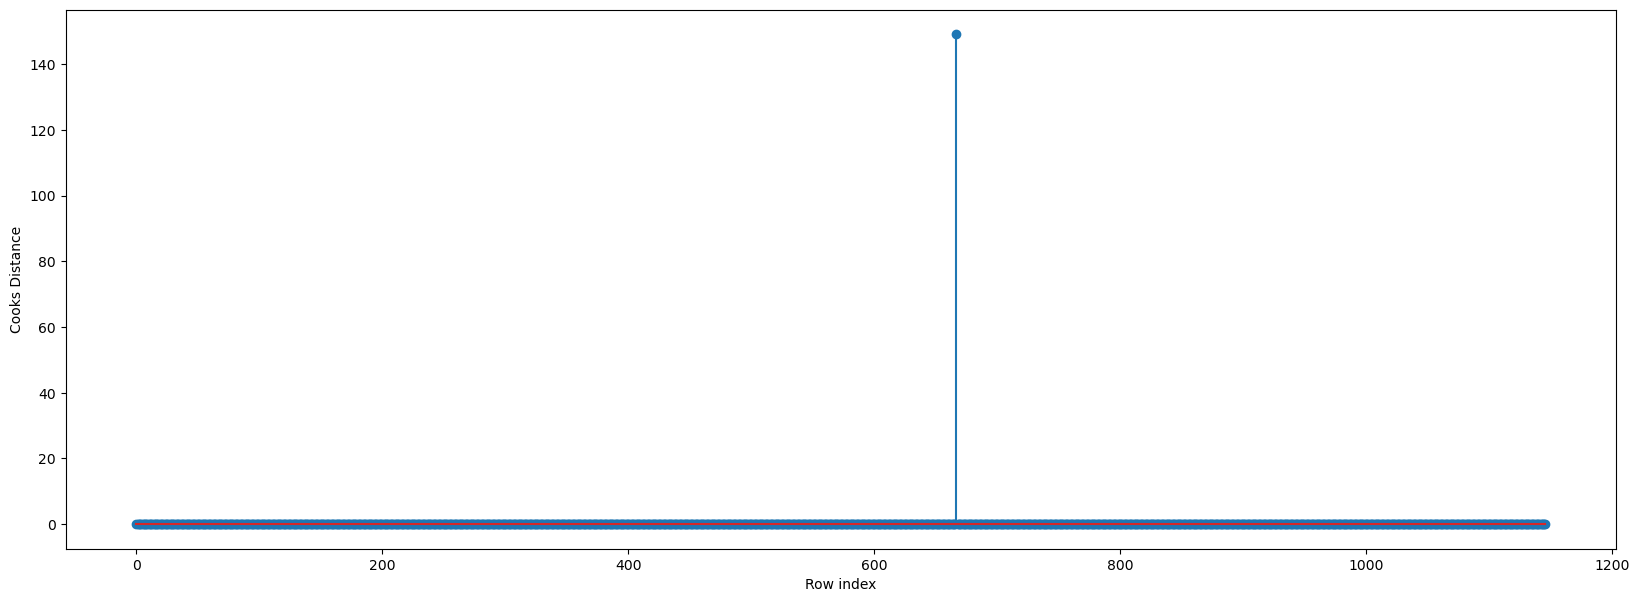

In [92]:
#Plot the influencers values using stem plot with train_set1
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(train_set1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [93]:
#Let find the max value index and value
(np.argmax(c),np.max(c))

(667, 149.0647480408496)

In [94]:
train_set2=train_set1.drop(train_set1.index[[677]],axis=0).reset_index()
train_set2

,index,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Price
0,0,50,22500,97,0,1400,3,5,1025,10800
1,1,68,80426,110,0,1600,3,5,1055,9950
2,2,59,130000,72,0,2000,4,5,1135,7500
3,3,71,76000,110,0,1600,5,5,1070,9250
4,4,65,59000,110,0,1600,5,5,1075,9750
...,...,...,...,...,...,...,...,...,...,...
1141,1142,69,155000,72,0,2000,3,5,1115,7950
1142,1143,54,63792,110,0,1600,5,5,1075,10250
1143,1144,11,12500,110,0,1600,5,5,1115,18900
1144,1145,30,34000,192,0,1800,3,5,1185,22750


In [95]:
#Drop the original index
train_set2=train_set2.drop(['index'],axis=1)
train_set2

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Price
0,50,22500,97,0,1400,3,5,1025,10800
1,68,80426,110,0,1600,3,5,1055,9950
2,59,130000,72,0,2000,4,5,1135,7500
3,71,76000,110,0,1600,5,5,1070,9250
4,65,59000,110,0,1600,5,5,1075,9750
...,...,...,...,...,...,...,...,...,...
1141,69,155000,72,0,2000,3,5,1115,7950
1142,54,63792,110,0,1600,5,5,1075,10250
1143,11,12500,110,0,1600,5,5,1115,18900
1144,30,34000,192,0,1800,3,5,1185,22750


In [96]:
Model2 = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight',data=train_set2).fit()
Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     936.7
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        23:25:55   Log-Likelihood:                -9864.0
No. Observations:                1146   AIC:                         1.975e+04
Df Residuals:                    1137   BIC:                         1.979e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9941.0250   1566.419     -6.346      0.000    -1.3e+04   -6867.628
Age_08_04   -122.0211      2.995    -40.740      0.000    -127.898    -116.144
KM            -0.0157      0.001    -10.501      0.000      -0.019      -0.013
HP            29.8427      3.057      9.762      0.000      23.845      35.841
Automatic    179.7699    174.779      1.029      0.304    -163.156     522.695
cc            -2.0978      0.321     -6.544      0.000      -2.727      -1.469
Doors        -64.2860     45.151     -1.424      0.155    -152.874      24.303
Gears        583.9947    236.536      2.469      0.014     119.899    1048.090
Weight        24.3926      1.251     19.493      0.000      21.937      26.848
==============================================================================
Omnibus:                      323.238   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5594.329
Skew:                          -0.831   Prob(JB):                         0.00
Kurtosis:                      13.695   Cond. No.                     3.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
model_influence2 = Model2.get_influence()
(c, _) = model_influence2.cooks_distance

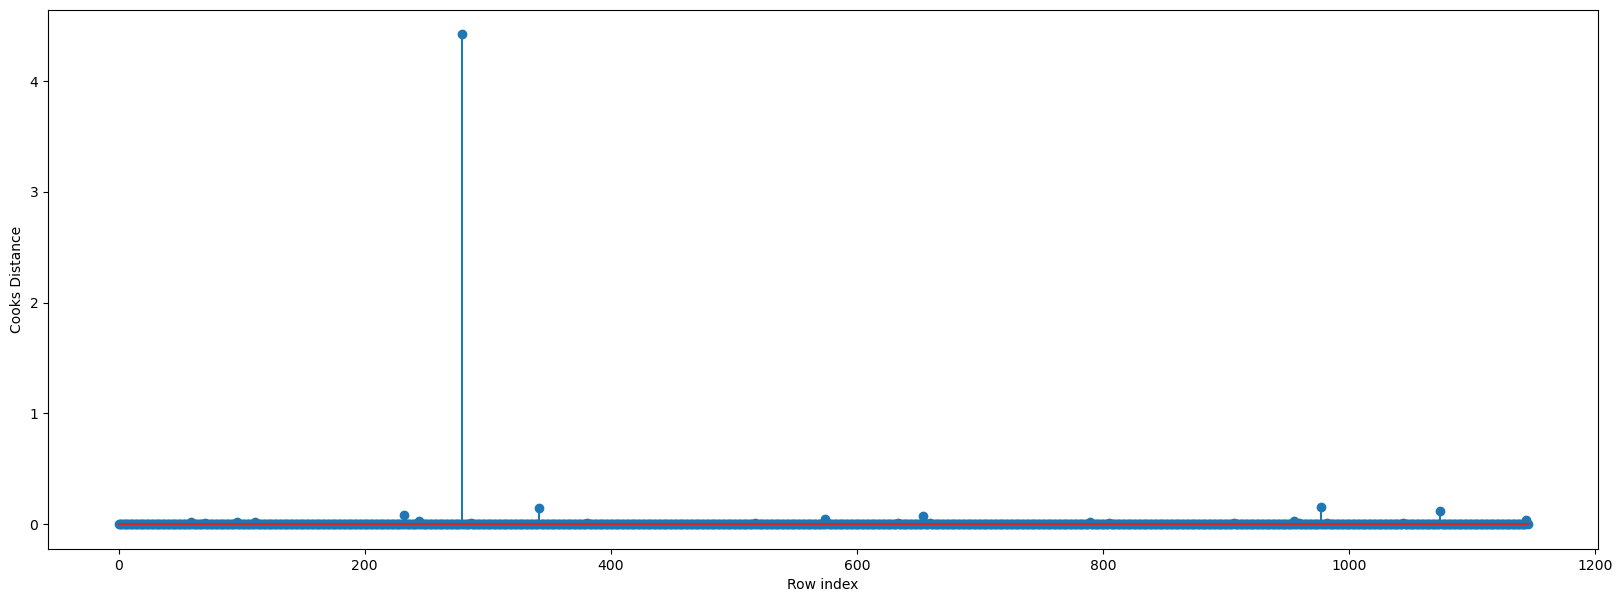

In [99]:
#Plot the influencers values using stem plot with train_set1
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(train_set2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [100]:
(np.argmax(c),np.max(c))

(279, 4.4206926774785495)

In [102]:
train_set3=train_set2.drop(train_set2.index[[279]],axis=0).reset_index()

In [101]:
train_set3

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Price
0,50,22500,97,0,1400,3,5,1025,10800
1,68,80426,110,0,1600,3,5,1055,9950
2,59,130000,72,0,2000,4,5,1135,7500
3,71,76000,110,0,1600,5,5,1070,9250
4,65,59000,110,0,1600,5,5,1075,9750
...,...,...,...,...,...,...,...,...,...
1141,69,155000,72,0,2000,3,5,1115,7950
1142,54,63792,110,0,1600,5,5,1075,10250
1143,11,12500,110,0,1600,5,5,1115,18900
1144,30,34000,192,0,1800,3,5,1185,22750


In [103]:
#Drop the original index
train_set3=train_set3.drop(['index'],axis=1)
train_set3

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Price
0,50,22500,97,0,1400,3,5,1025,10800
1,68,80426,110,0,1600,3,5,1055,9950
2,59,130000,72,0,2000,4,5,1135,7500
3,71,76000,110,0,1600,5,5,1070,9250
4,65,59000,110,0,1600,5,5,1075,9750
...,...,...,...,...,...,...,...,...,...
1140,69,155000,72,0,2000,3,5,1115,7950
1141,54,63792,110,0,1600,5,5,1075,10250
1142,11,12500,110,0,1600,5,5,1115,18900
1143,30,34000,192,0,1800,3,5,1185,22750


In [104]:
Model3 = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight',data=train_set3).fit()
Model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1070.
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        23:28:45   Log-Likelihood:                -9788.8
No. Observations:                1145   AIC:                         1.960e+04
Df Residuals:                    1136   BIC:                         1.964e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.593e+04   1561.547    -10.204      0.000    -1.9e+04   -1.29e+04
Age_08_04   -114.5565      2.895    -39.573      0.000    -120.236    -108.877
KM            -0.0151      0.001    -10.695      0.000      -0.018      -0.012
HP            31.6470      2.888     10.957      0.000      25.980      37.314
Automatic    -51.5439    166.048     -0.310      0.756    -377.339     274.251
cc            -3.4576      0.323    -10.692      0.000      -4.092      -2.823
Doors       -135.5191     43.019     -3.150      0.002    -219.925     -51.113
Gears        461.3862    223.409      2.065      0.039      23.046     899.726
Weight        32.2414      1.353     23.833      0.000      29.587      34.896
==============================================================================
Omnibus:                      140.385   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1059.115
Skew:                          -0.272   Prob(JB):                    1.04e-230
Kurtosis:                       7.680   Cond. No.                     3.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
model_influence3 = Model3.get_influence()
(c, _) = model_influence3.cooks_distance

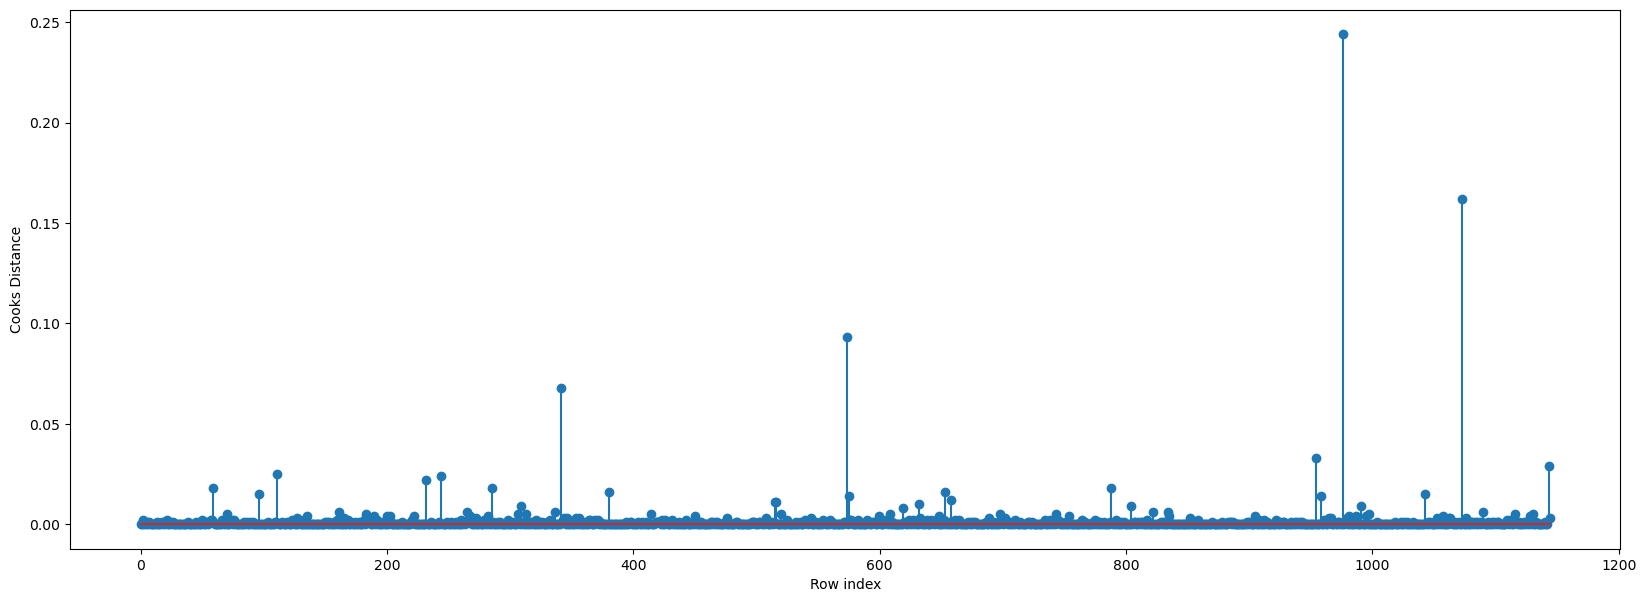

In [106]:
#Plot the influencers values using stem plot with train_set1
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(train_set3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [107]:
k = 9
n = 1145
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.026200873362445413

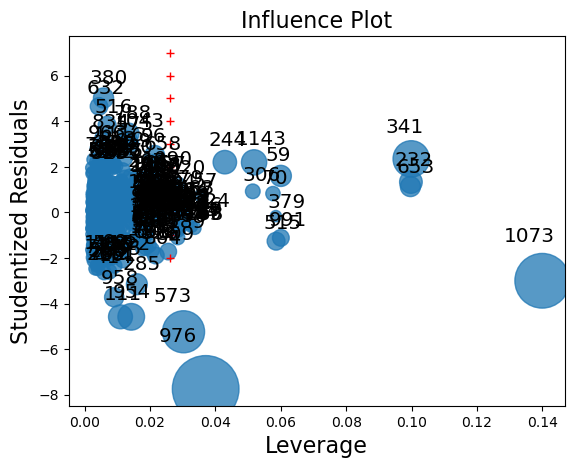

In [109]:
influence_plot(Model3,alpha=.05)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [110]:
train_set4=train_set3.drop(train_set3.index[[99,379,6,70,341,222,653,1073,515,143]],axis=0).reset_index()
train_set4

,index,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Price
0,0,50,22500,97,0,1400,3,5,1025,10800
1,1,68,80426,110,0,1600,3,5,1055,9950
2,2,59,130000,72,0,2000,4,5,1135,7500
3,3,71,76000,110,0,1600,5,5,1070,9250
4,4,65,59000,110,0,1600,5,5,1075,9750
...,...,...,...,...,...,...,...,...,...,...
1130,1140,69,155000,72,0,2000,3,5,1115,7950
1131,1141,54,63792,110,0,1600,5,5,1075,10250
1132,1142,11,12500,110,0,1600,5,5,1115,18900
1133,1143,30,34000,192,0,1800,3,5,1185,22750


In [111]:
#Drop the original index
train_set4=train_set4.drop(['index'],axis=1)

In [114]:
Model4 = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight',data=train_set4).fit()
Model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     987.7
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        23:35:37   Log-Likelihood:                -9697.0
No. Observations:                1135   AIC:                         1.941e+04
Df Residuals:                    1126   BIC:                         1.946e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.383e+04   1736.328     -7.964      0.000   -1.72e+04   -1.04e+04
Age_08_04   -115.4257      2.933    -39.356      0.000    -121.180    -109.671
KM            -0.0149      0.001    -10.556      0.000      -0.018      -0.012
HP            32.6693      3.023     10.808      0.000      26.739      38.600
Automatic     26.8963    166.723      0.161      0.872    -300.226     354.019
cc            -3.3134      0.335     -9.897      0.000      -3.970      -2.657
Doors       -134.9223     43.718     -3.086      0.002    -220.699     -49.145
Gears        234.4109    243.560      0.962      0.336    -243.473     712.294
Weight        31.0556      1.504     20.654      0.000      28.105      34.006
==============================================================================
Omnibus:                      132.826   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1003.172
Skew:                          -0.223   Prob(JB):                    1.46e-218
Kurtosis:                       7.584   Cond. No.                     3.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
model_influence4 = Model4.get_influence()
(c, _) = model_influence4.cooks_distance

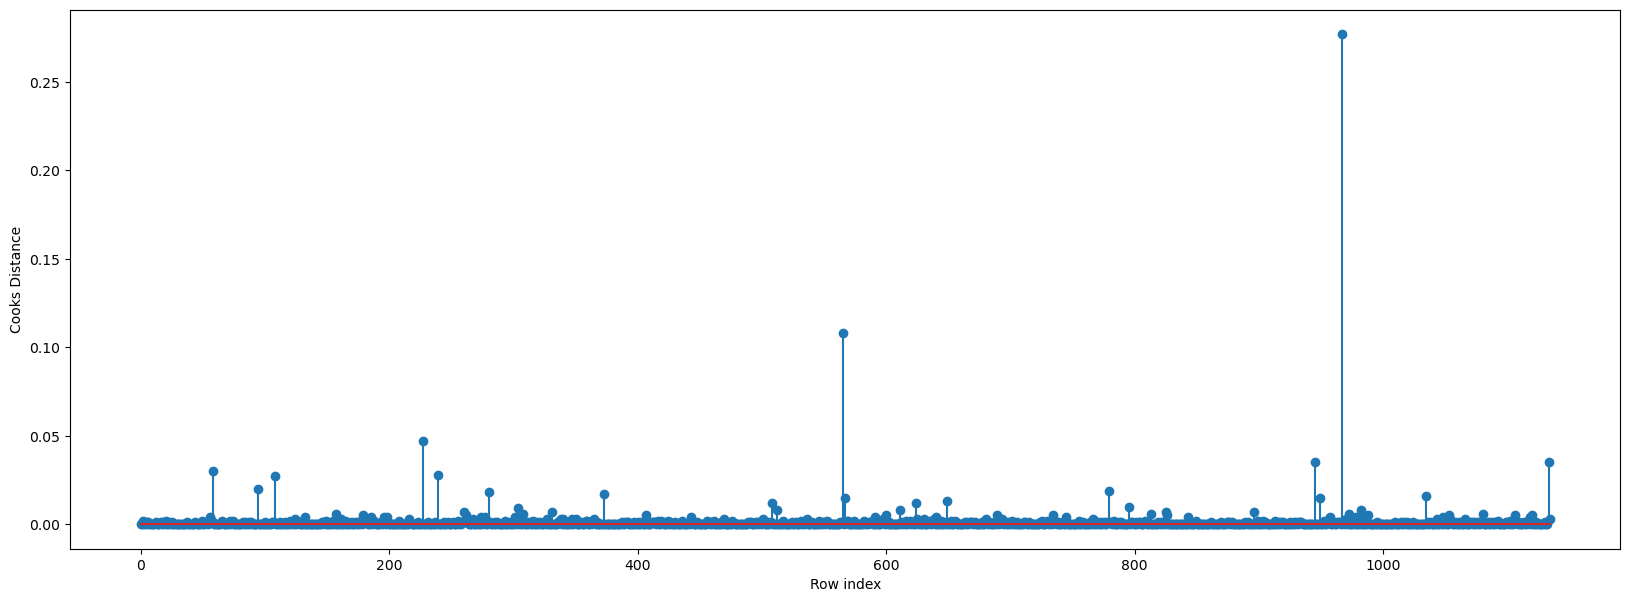

In [116]:
#Plot the influencers values using stem plot with train_set1
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(train_set4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [117]:
k = 9
n = 1135
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.026431718061674013

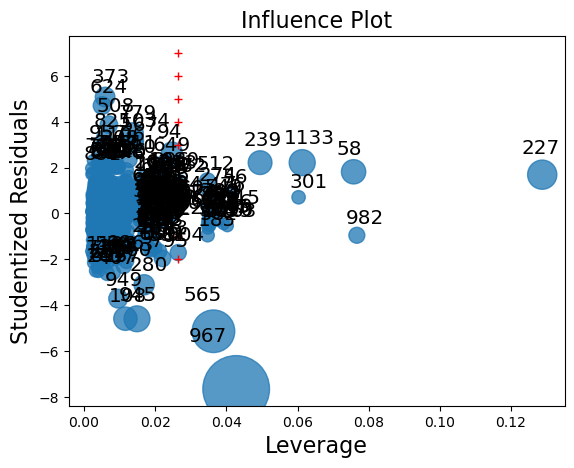

In [118]:
influence_plot(Model4,alpha=.05)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [119]:
239,1133,301,58,227,982,967,565

train_set5=train_set4.drop(train_set4.index[[239,1133,301,58,227,982,967,565]],axis=0).reset_index()
train_set5

,index,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Price
0,0,50,22500,97,0,1400,3,5,1025,10800
1,1,68,80426,110,0,1600,3,5,1055,9950
2,2,59,130000,72,0,2000,4,5,1135,7500
3,3,71,76000,110,0,1600,5,5,1070,9250
4,4,65,59000,110,0,1600,5,5,1075,9750
...,...,...,...,...,...,...,...,...,...,...
1122,1129,56,52000,97,0,1400,3,5,1025,10000
1123,1130,69,155000,72,0,2000,3,5,1115,7950
1124,1131,54,63792,110,0,1600,5,5,1075,10250
1125,1132,11,12500,110,0,1600,5,5,1115,18900


In [123]:
train_set5

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Price
0,50,22500,97,0,1400,3,5,1025,10800
1,68,80426,110,0,1600,3,5,1055,9950
2,59,130000,72,0,2000,4,5,1135,7500
3,71,76000,110,0,1600,5,5,1070,9250
4,65,59000,110,0,1600,5,5,1075,9750
...,...,...,...,...,...,...,...,...,...
1122,56,52000,97,0,1400,3,5,1025,10000
1123,69,155000,72,0,2000,3,5,1115,7950
1124,54,63792,110,0,1600,5,5,1075,10250
1125,11,12500,110,0,1600,5,5,1115,18900


In [125]:
Model5 = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight',data=train_set5).fit()
Model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1004.
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        23:42:16   Log-Likelihood:                -9580.6
No. Observations:                1127   AIC:                         1.918e+04
Df Residuals:                    1118   BIC:                         1.922e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.502e+04   1836.971     -8.178      0.000   -1.86e+04   -1.14e+04
Age_08_04   -111.6814      2.893    -38.610      0.000    -117.357    -106.006
KM            -0.0165      0.001    -12.012      0.000      -0.019      -0.014
HP            27.6691      3.192      8.669      0.000      21.407      33.931
Automatic    -49.2645    161.934     -0.304      0.761    -366.994     268.465
cc            -3.3171      0.334     -9.942      0.000      -3.972      -2.662
Doors       -164.8610     43.348     -3.803      0.000    -249.914     -79.808
Gears        229.7792    244.497      0.940      0.348    -249.945     709.503
Weight        32.7001      1.614     20.254      0.000      29.532      35.868
==============================================================================
Omnibus:                       73.983   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.387
Skew:                           0.212   Prob(JB):                     6.40e-58
Kurtosis:                       5.330   Cond. No.                     3.96e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
k = 9
n = 1127
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.026619343389529725

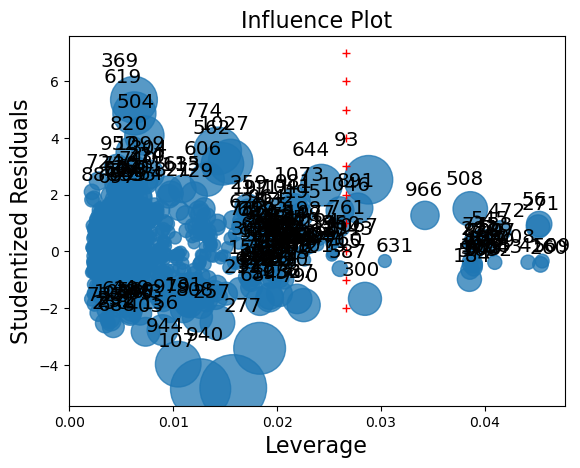

In [126]:
influence_plot(Model5,alpha=.05)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [129]:
model_influence5 = Model5.get_influence()
(c, _) = model_influence5.cooks_distance

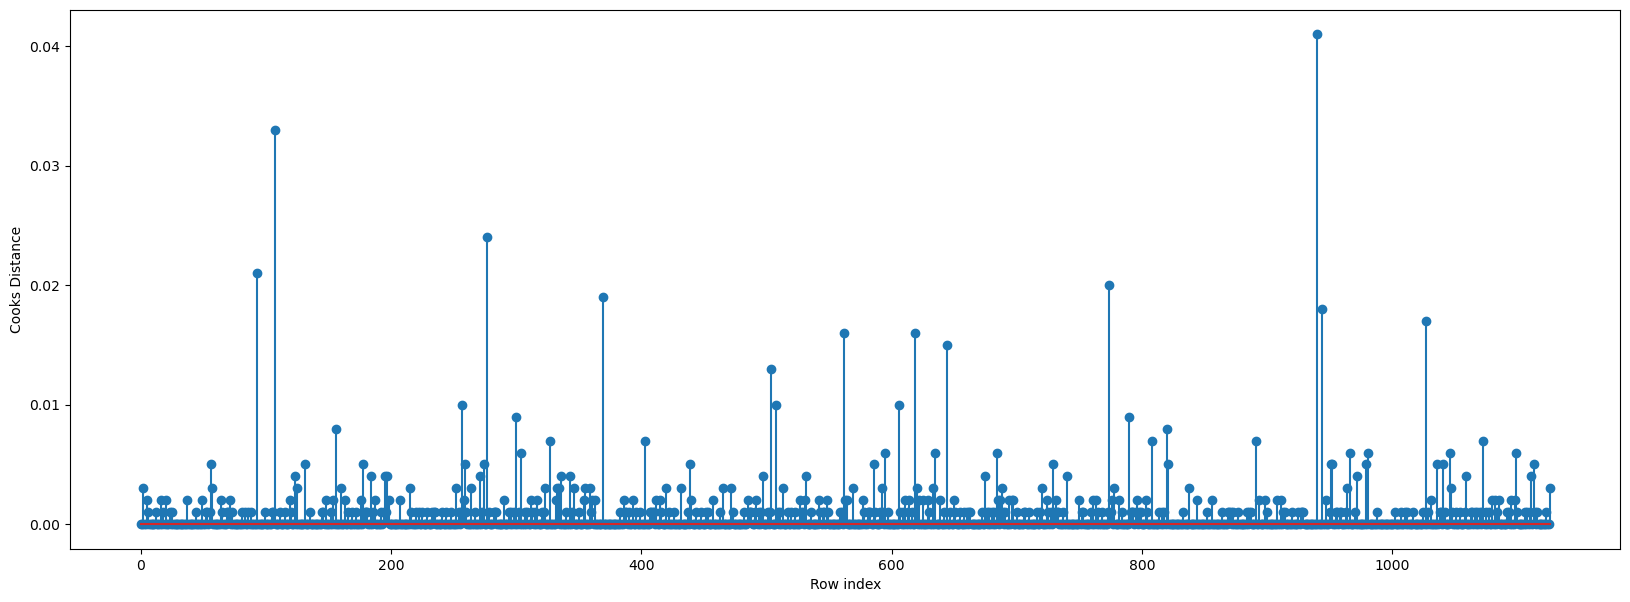

In [130]:
#Plot the influencers values using stem plot with train_set1
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(train_set5)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [131]:
# From the above stem plot we can see that all cooks distance value are less than 0.5. so the final is fine.

Predicit the Y values using the model

In [139]:
pred_y = Model5.predict(test_set)
pred_y

1148    11351.009376
1149     8579.699095
1150     6820.771574
1151     9991.819620
1152     7839.901331
            ...     
1431     7136.081580
1432     7779.813239
1433     7907.094465
1434     8948.035514
1435     6294.864704
Length: 288, dtype: float64

In [140]:
df= pd.DataFrame()
df["Predicted_y"]= pd.DataFrame(pred_y)
df["actual_y"] = test_set["Price"]
df

,Predicted_y,actual_y
1148,11351.009376,12500
1149,8579.699095,9950
1150,6820.771574,6950
1151,9991.819620,9750
1152,7839.901331,6950
...,...,...
1431,7136.081580,6900
1432,7779.813239,7950
1433,7907.094465,6950
1434,8948.035514,9750


In [142]:
mse = mean_squared_error(df["actual_y"], df["Predicted_y"])
mse

2103277.8634717716

In [143]:
rmse = np.sqrt(mse)
rmse

1450.2682039787578

In [144]:
# Estimation of mean absolute error
mae = mean_absolute_error(df["actual_y"], df["Predicted_y"])
mae

943.9532230573657